In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist.load_data()
cifar10 = tf.keras.datasets.cifar10.load_data()
imdb = tf.keras.datasets.imdb.load_data()


17464789/17464789 [==============================] - 3s 0us/step


Ejemplo de modelo de tensor Flow

In [6]:
from tensorflow.keras import layers, models

In [4]:
# Cargar y preparar el conjunto de datos MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 #Normaliza los datos, los pixel tienen 255 espacios, por eso el 255

In [7]:
# Definir el modelo
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

In [8]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Entrenar el modelo
model.fit(x_train, y_train, epochs=5)

Epoch 1/5


1875/1875 [==============================] - 6s 3ms/step - loss: 0.2932 - accuracy: 0.9138
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1445 - accuracy: 0.9578
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1061 - accuracy: 0.9679
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0883 - accuracy: 0.9729
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0747 - accuracy: 0.9767


In [10]:
# Evaluar el modelo
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0802 - accuracy: 0.9766 - 816ms/epoch - 3ms/step


[0.0801958292722702, 0.9765999913215637]

Ejemplo de uso


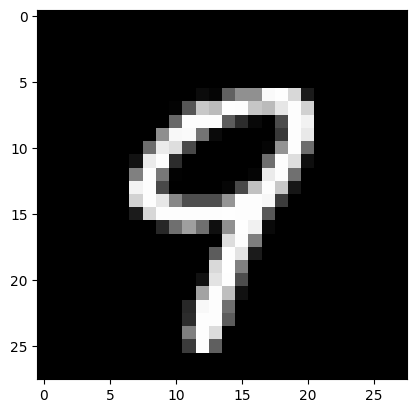

1/1 [==============================] - 0s 83ms/step
El modelo predice que el dígito es: 9


In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Selecciona una imagen del conjunto de prueba
img = x_test[1532]

# Muestra la imagen
plt.imshow(img, cmap='gray')
plt.show()

# Expande las dimensiones de la imagen para que se ajuste al modelo
img = np.expand_dims(img, axis=0)

# Haz una predicción
predictions = model.predict(img)  # Usa el model que se preparo antes!

# Interpreta la predicción
predicted_digit = np.argmax(predictions)
print(f"El modelo predice que el dígito es: {predicted_digit}")


Ejemplo de uso con TensorFlow y CIFAR-10

In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [21]:
# Cargar y preparar el conjunto de datos CIFAR-10
(x_train2, y_train2), (x_test2, y_test2) = tf.keras.datasets.cifar10.load_data()
x_train2, x_test2 = x_train2 / 255.0, x_test2 / 255.0

In [22]:
# Definir el modelo
model2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [23]:
# Compilar el modelo
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
# Entrenar el modelo
model2.fit(x_train2, y_train2, epochs=10, 
          validation_data=(x_test2, y_test2))

Epoch 1/10
1563/1563 [==============================] - 29s 17ms/step - loss: 1.5516 - accuracy: 0.4342 - val_loss: 1.3604 - val_accuracy: 0.5221
Epoch 2/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.1795 - accuracy: 0.5790 - val_loss: 1.0842 - val_accuracy: 0.6148
Epoch 3/10
1563/1563 [==============================] - 32s 21ms/step - loss: 1.0252 - accuracy: 0.6415 - val_loss: 1.1087 - val_accuracy: 0.6147
Epoch 4/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9302 - accuracy: 0.6720 - val_loss: 0.9610 - val_accuracy: 0.6633
Epoch 5/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8576 - accuracy: 0.6986 - val_loss: 0.9202 - val_accuracy: 0.6782
Epoch 6/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.8046 - accuracy: 0.7179 - val_loss: 0.8979 - val_accuracy: 0.6884
Epoch 7/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7531 - accuracy: 0.7355 - val_loss: 0.8918 -

In [26]:
# Evaluar el modelo
model2.evaluate(x_test2, y_test2, verbose=2)

313/313 - 1s - loss: 0.8982 - accuracy: 0.7045 - 1s/epoch - 4ms/step


[0.8982100486755371, 0.7045000195503235]

modelo 3

3. IMDB
IMDB es un conjunto de datos para el análisis de sentimientos, compuesto por 25,000 críticas de películas para entrenamiento y 25,000 críticas para prueba. Las críticas están etiquetadas como positivas o negativas.

In [32]:
import tensorflow as tf
from tensorflow.keras import layers, models, preprocessing

# Cargar y preparar el conjunto de datos IMDB
(x_train3, y_train3), (x_test3, y_test3) = tf.keras.datasets.imdb.load_data(num_words=10000)

# Preprocesar los datos
x_train3 = preprocessing.sequence.pad_sequences(x_train3, maxlen=256)
x_test3 = preprocessing.sequence.pad_sequences(x_test3, maxlen=256)

# Definir el modelo
model3 = models.Sequential([
    layers.Embedding(10000, 16),
    layers.GlobalAveragePooling1D(),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
model3.fit(x_train3, y_train3, epochs=10, 
          validation_data=(x_test3, y_test3), 
          verbose=2)

# Evaluar el modelo
model3.evaluate(x_test3, y_test3, verbose=2)


Epoch 1/10
782/782 - 5s - loss: 0.5191 - accuracy: 0.7670 - val_loss: 0.3359 - val_accuracy: 0.8702 - 5s/epoch - 7ms/step
Epoch 2/10
782/782 - 3s - loss: 0.2656 - accuracy: 0.8994 - val_loss: 0.2823 - val_accuracy: 0.8846 - 3s/epoch - 4ms/step
Epoch 3/10
782/782 - 3s - loss: 0.2075 - accuracy: 0.9223 - val_loss: 0.2818 - val_accuracy: 0.8839 - 3s/epoch - 4ms/step
Epoch 4/10
782/782 - 3s - loss: 0.1730 - accuracy: 0.9367 - val_loss: 0.2911 - val_accuracy: 0.8827 - 3s/epoch - 4ms/step
Epoch 5/10
782/782 - 3s - loss: 0.1488 - accuracy: 0.9482 - val_loss: 0.3167 - val_accuracy: 0.8768 - 3s/epoch - 4ms/step
Epoch 6/10
782/782 - 3s - loss: 0.1294 - accuracy: 0.9568 - val_loss: 0.3347 - val_accuracy: 0.8748 - 3s/epoch - 4ms/step
Epoch 7/10
782/782 - 3s - loss: 0.1135 - accuracy: 0.9627 - val_loss: 0.3629 - val_accuracy: 0.8714 - 3s/epoch - 4ms/step
Epoch 8/10
782/782 - 3s - loss: 0.1006 - accuracy: 0.9684 - val_loss: 0.3991 - val_accuracy: 0.8690 - 3s/epoch - 4ms/step
Epoch 9/10
782/782 - 3s 

[0.46033960580825806, 0.860319972038269]

Ejemplo de uso

In [33]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Definir la revisión que queremos analizar
review_text = "Esta película fue realmente genial. Me encantó cada momento de ella."

# Cargar el modelo previamente entrenado
model3 = tf.keras.models.load_model('imdb_sentiment_analysis_model.h5')

# Tokenizar la revisión (convertir palabras en índices)
word_index = tf.keras.datasets.imdb.get_word_index()
words = review_text.lower().split()
review_sequence = [word_index[word] if word in word_index and word_index[word] < 10000 else 0 for word in words]

# Asegurarse de que la revisión tenga la misma longitud que las revisiones de entrenamiento
review_sequence = pad_sequences([review_sequence], maxlen=256)

# Hacer la predicción
prediction = model3.predict(review_sequence)

# Interpretar la predicción
sentiment = "positivo" if prediction > 0.5 else "negativo"
confidence = prediction if prediction > 0.5 else 1 - prediction

# Mostrar el resultado
print(f"Sentimiento de la revisión: {sentiment} (confianza: {confidence:.2f})")


OSError: No file or directory found at imdb_sentiment_analysis_model.h5